# Loan Application Status Prediction

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes
details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1. Loan_ID - This refer to the unique identifier of the applicant&#39;s affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which
applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic
instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner
of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant&#39;s use
under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that
participate in the loan application process alongside the main applicant use under State
law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the
applicant
11. Credit History - This refers to a record of applicant&#39;s ability to repay debts and
demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set
out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan
requested.

You have to build a model that can predict whether the loan of the applicant will be
approved(Loan_status) or not on the basis of the details provided in the dataset.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [27]:
!pip install imbalanced-learn

In [28]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [29]:
conda update -n base -c defaults conda


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [34]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis

In [36]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
# Select the columns you want to keep
selected_columns = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                    'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

# Create a new DataFrame with only the selected columns
new_df = df[selected_columns].copy()

print(new_df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [39]:
#Encoding categorical columns using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in new_df.columns:
    if new_df[i].dtypes == 'object':
        new_df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
new_df    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [40]:
#Filling null values in columns with its mean

new_df["Gender"]=new_df['Gender'].fillna(new_df['Gender'].mean())
new_df["Married"]=new_df['Married'].fillna(new_df['Married'].mean())
new_df["Dependents"]=new_df['Dependents'].fillna(new_df['Dependents'].mean())
new_df["Self_Employed"]=new_df['Self_Employed'].fillna(new_df['Self_Employed'].mean())
new_df["LoanAmount"]=new_df['LoanAmount'].fillna(new_df['LoanAmount'].mean())
new_df["Loan_Amount_Term"]=new_df['Loan_Amount_Term'].fillna(new_df['Loan_Amount_Term'].mean())
new_df["Credit_History"]=new_df['Credit_History'].fillna(new_df['Credit_History'].mean())
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [41]:
#checking the dimension of the dataset

new_df.shape

(614, 13)

In [42]:
new_df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [43]:
new_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0
613,613.0,0.0,0.0,0.0,0.0,1.0,4583,0.0,133.0,360.0,0.0,1.0,0.0


<AxesSubplot:>

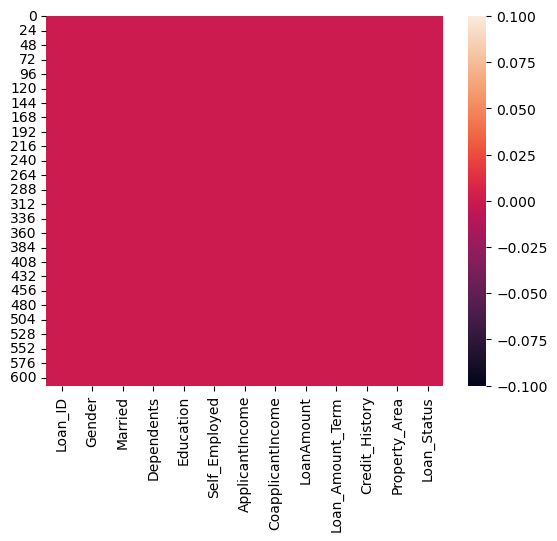

In [44]:
#lets visualize it using heatmap
sns.heatmap(new_df.isnull())

This gives the brief about the dataset which includes indexing type, indexing type, column type, no null values and memory usage. 

In [45]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [47]:
#loan status, yes =1 and no=0

new_df['Loan_Status'].unique()

array([1., 0.])

In [48]:
new_df['Loan_Status'] = new_df['Loan_Status'].astype('int64')


In [49]:
new_df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 62.5 KB


In [51]:
#checking the value counts of each column

for i in new_df.columns:
    print(new_df[i].value_counts())
    print("\n")

0.0      1
412.0    1
405.0    1
406.0    1
407.0    1
        ..
205.0    1
206.0    1
207.0    1
208.0    1
613.0    1
Name: Loan_ID, Length: 614, dtype: int64


1.000000    489
0.000000    112
0.813644     13
Name: Gender, dtype: int64


1.000000    398
0.000000    213
0.651391      3
Name: Married, dtype: int64


0.000000    345
1.000000    102
2.000000    101
3.000000     51
0.762938     15
Name: Dependents, dtype: int64


0.0    480
1.0    134
Name: Education, dtype: int64


0.000000    500
1.000000     82
0.140893     32
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000 

These are the value counts of all columns, let's check the unique value of column.

In [52]:
grouped_data= new_df.groupby('Loan_Status')
print(grouped_data.mean())

                Loan_ID    Gender   Married  Dependents  Education  \
Loan_Status                                                          
0            303.406250  0.802439  0.588542    0.753008   0.270833   
1            307.907583  0.818742  0.679986    0.767456   0.194313   

             Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status                                                                  
0                 0.142021      5446.078125        1877.807292  150.945488   
1                 0.140380      5384.068720        1504.516398  144.349606   

             Loan_Amount_Term  Credit_History  Property_Area  
Loan_Status                                                   
0                  344.000000        0.562232       1.000000  
1                  341.090047        0.969577       1.054502  


In [53]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in new_df.dtypes.index:
    if new_df.dtypes[i]!="float":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in new_df.dtypes.index:
    if new_df.dtypes[i]=="float":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['ApplicantIncome', 'Loan_Status']
Numerical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [54]:
new_df.describe().round(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,306.50,0.81,0.65,0.76,0.22,0.14,5403.46,1621.25,146.41,342.00,0.84,1.04,0.69
std,177.39,0.39,0.48,1.00,0.41,0.34,6109.04,2926.25,84.04,64.37,0.35,0.79,0.46
min,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,9.00,12.00,0.00,0.00,0.00
25%,153.25,1.00,0.00,0.00,0.00,0.00,2877.50,0.00,100.25,360.00,1.00,0.00,0.00
50%,306.50,1.00,1.00,0.00,0.00,0.00,3812.50,1188.50,129.00,360.00,1.00,1.00,1.00
75%,459.75,1.00,1.00,1.00,0.00,0.00,5795.00,2297.25,164.75,360.00,1.00,2.00,1.00
max,613.00,1.00,1.00,3.00,1.00,1.00,81000.00,41667.00,700.00,480.00,1.00,2.00,1.00


This gives the statistical information of the numerical columns.

From the above description we can observe the following:

The counts of all the columns are same which means there are no missing values in the data set.

The mean value is higher than the median(50%) Type of glass column which means the data is skewed to right in this column.

By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data

We can also notice the Standard deviation, min 25% values from the described method.

In [55]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


# Data Visualization 


Univariate Analysis

1    422
0    192
Name: Loan_Status, dtype: int64


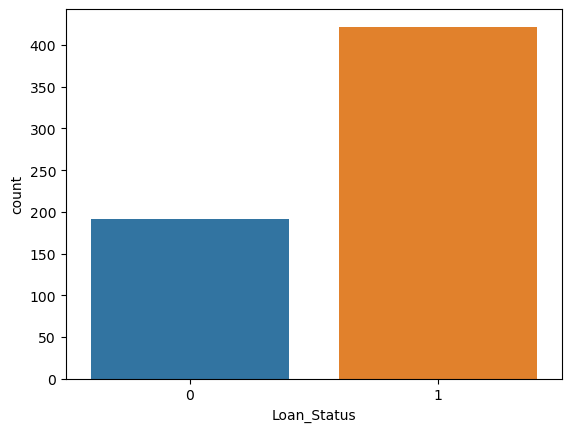

In [56]:
#visualize the number of Loan status application, Yes =1, No=0

ax=sns.countplot(x= 'Loan_Status',data=new_df)
print(new_df['Loan_Status'].value_counts())


In [57]:
new_df.corr().round(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.00,-0.03,-0.02,0.05,0.04,0.03,0.02,0.04,0.04,-0.03,-0.03,-0.16,0.01
Gender,-0.03,1.00,0.36,0.17,0.05,-0.01,0.05,0.08,0.10,-0.07,0.02,-0.02,0.02
Married,-0.02,0.36,1.00,0.34,0.01,0.00,0.05,0.08,0.15,-0.10,0.00,0.00,0.09
Dependents,0.05,0.17,0.34,1.00,0.06,0.06,0.12,0.03,0.16,-0.10,-0.05,0.01,0.01
Education,0.04,0.05,0.01,0.06,1.00,-0.01,-0.14,-0.06,-0.17,-0.08,-0.08,-0.07,-0.09
Self_Employed,0.03,-0.01,0.00,0.06,-0.01,1.00,0.13,-0.01,0.12,-0.04,0.00,-0.03,-0.00
ApplicantIncome,0.02,0.05,0.05,0.12,-0.14,0.13,1.00,-0.12,0.57,-0.05,-0.01,-0.01,-0.00
CoapplicantIncome,0.04,0.08,0.08,0.03,-0.06,-0.01,-0.12,1.00,0.19,-0.06,-0.00,0.01,-0.06
LoanAmount,0.04,0.10,0.15,0.16,-0.17,0.12,0.57,0.19,1.00,0.04,-0.01,-0.04,-0.04
Loan_Amount_Term,-0.03,-0.07,-0.10,-0.10,-0.08,-0.04,-0.05,-0.06,0.04,1.00,0.00,-0.08,-0.02


# Bivariate Analysis


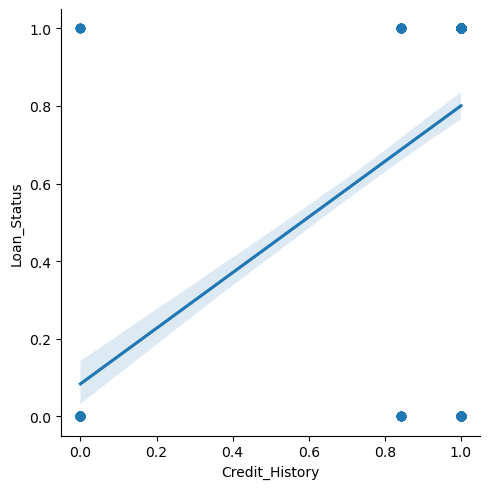

In [58]:
#After observing the correlation graph, we plot two variable graph to check the relation since Credit history shows the strongest correlation with Loan_status, we will check it first. 

sns.lmplot(x='Credit_History',y='Loan_Status',data=new_df,palette='colorblind')

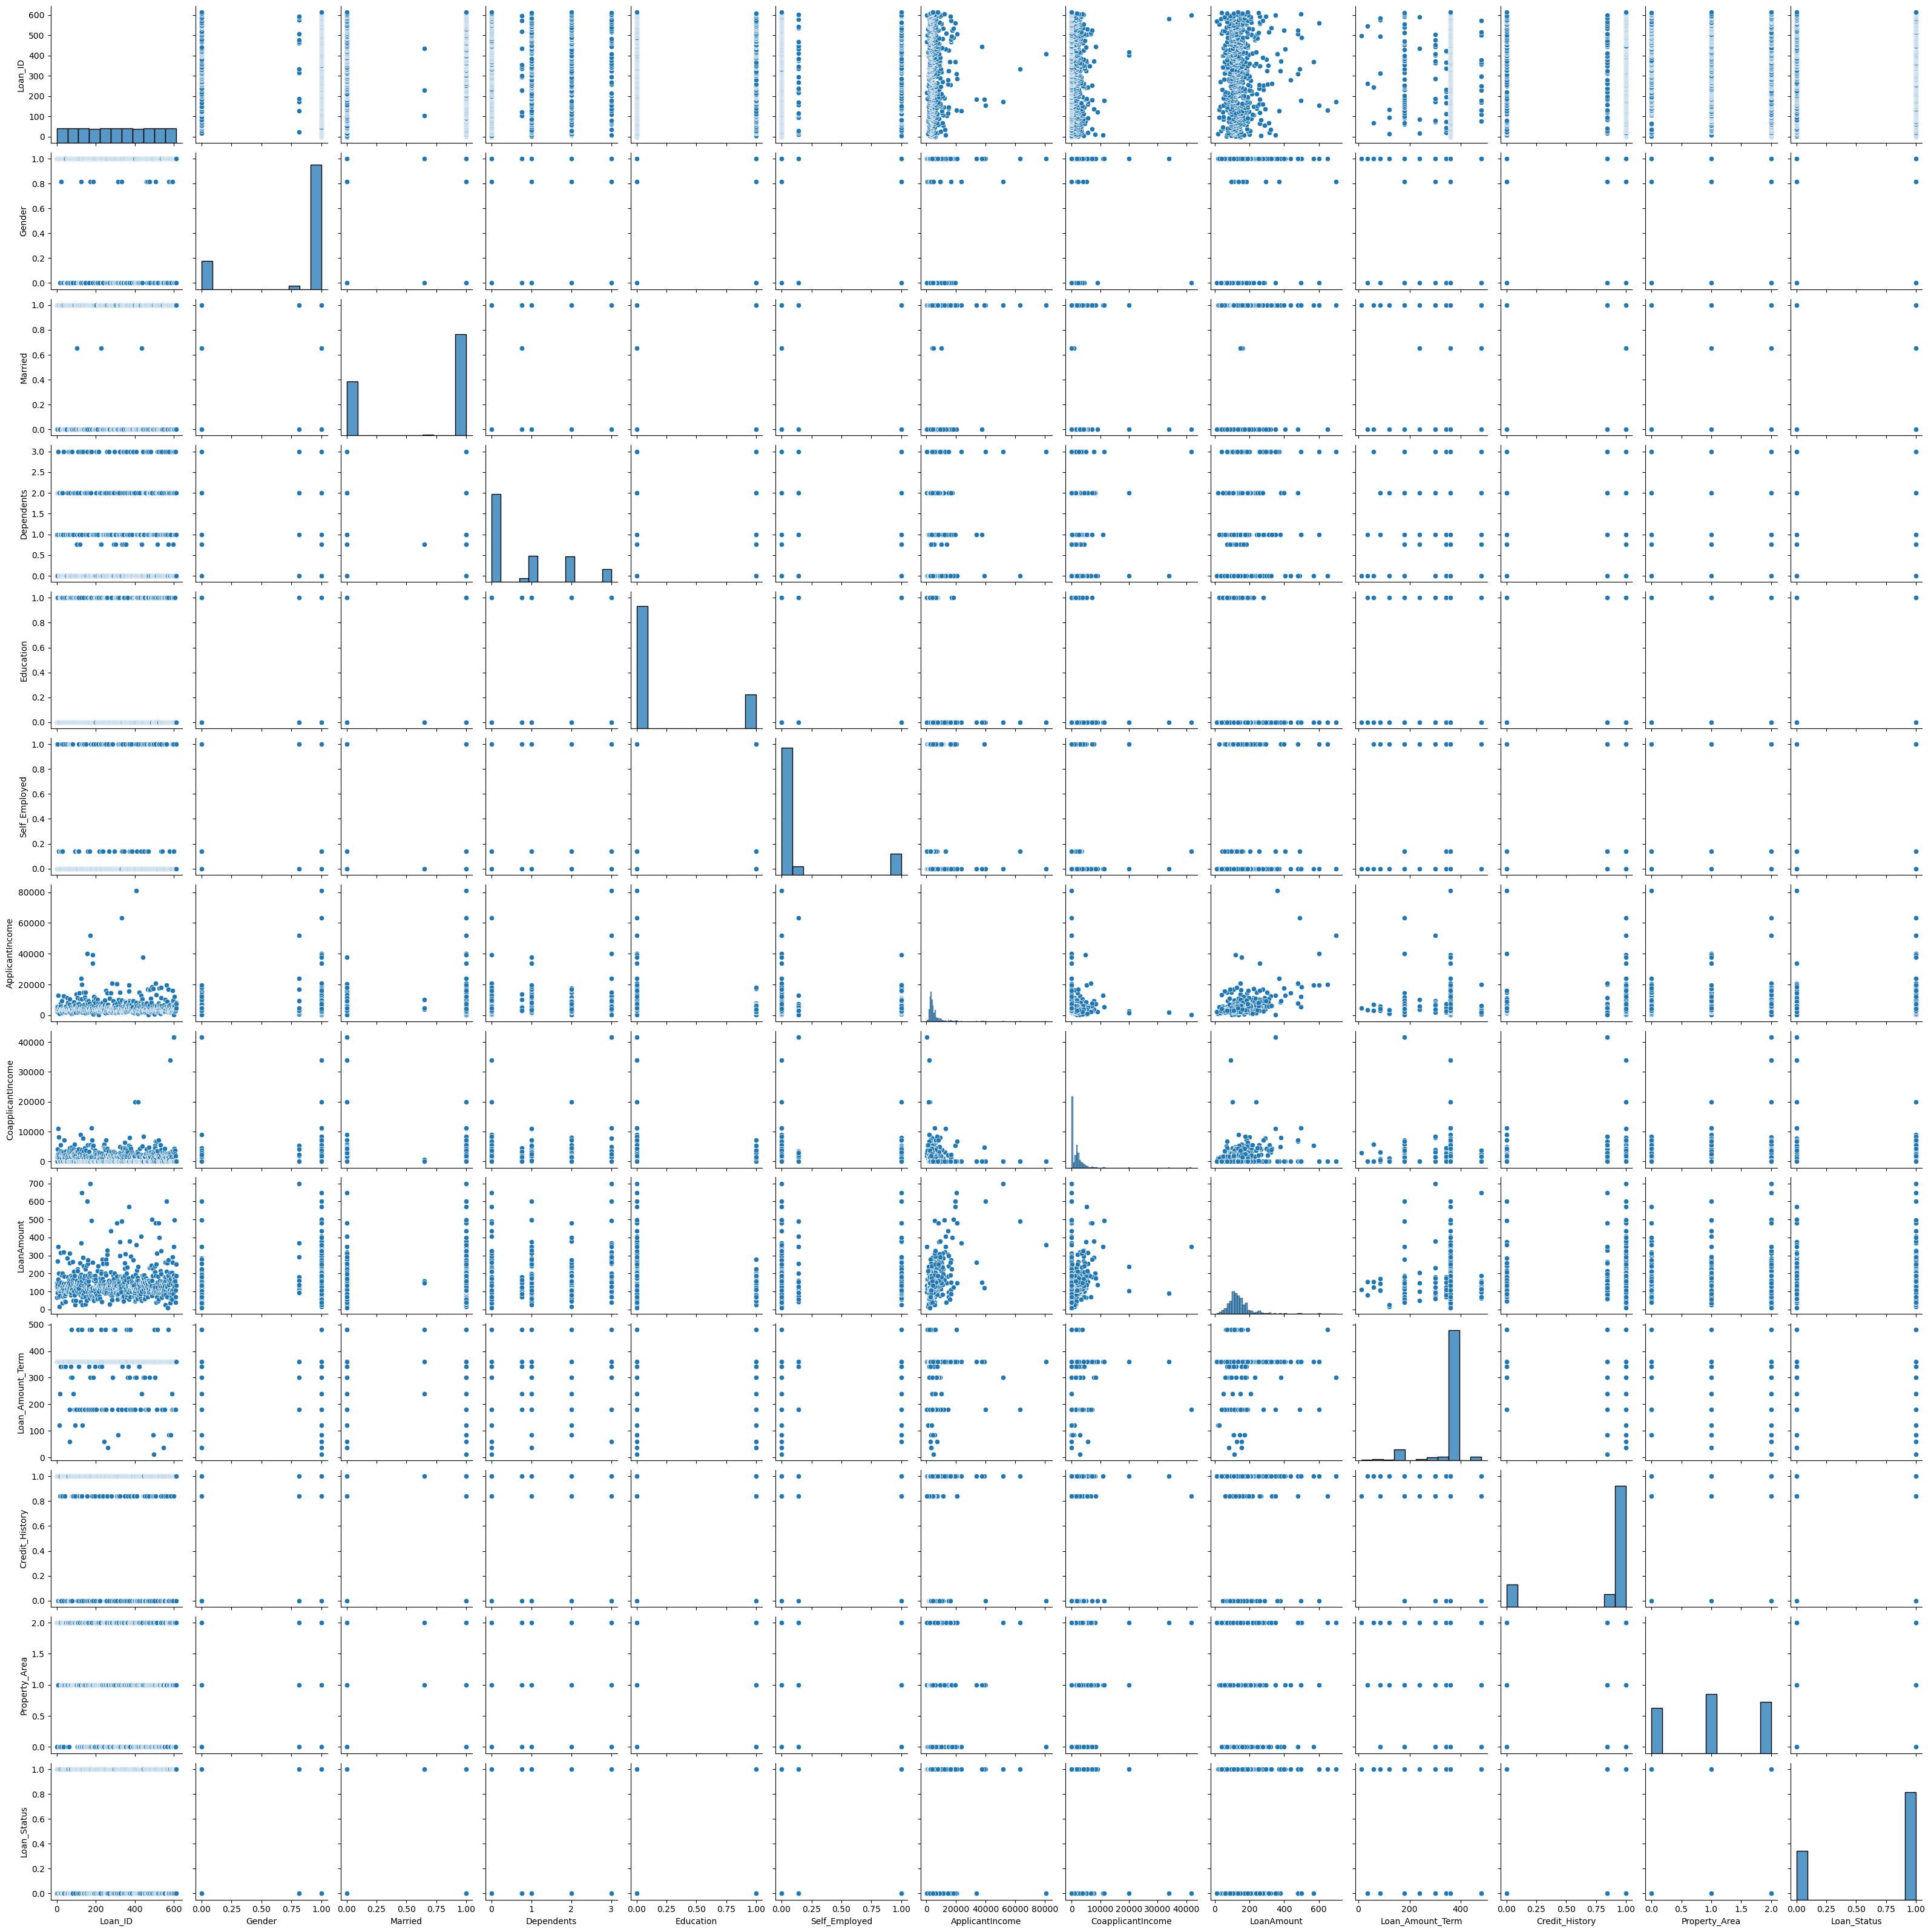

In [59]:
sns.pairplot(new_df)

<AxesSubplot:>

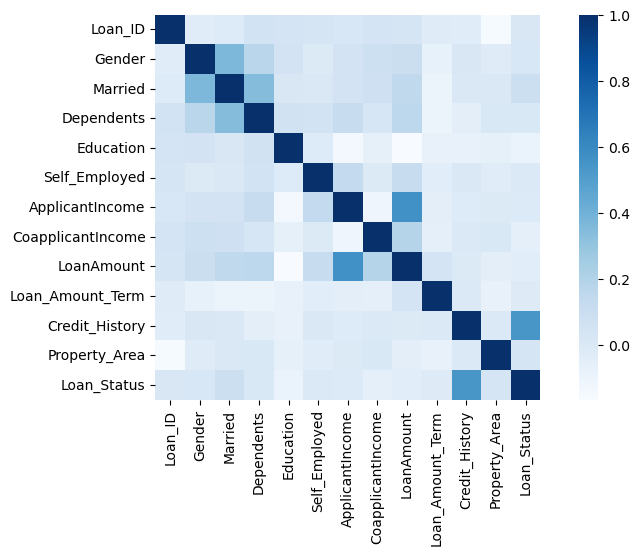

In [60]:
#Correlation Map

cor = new_df.corr(method ="pearson")
f, ax=plt.subplots(figsize = (10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),
           cmap="Blues",square=True, ax= ax)

Looking at the correlation graph, Credit history has the strongest correlation with Loan_status, Loan_Amount is highly correlated to ApplicantIncome

In [61]:
new_df.shape

(614, 13)

# Checking for Outlier

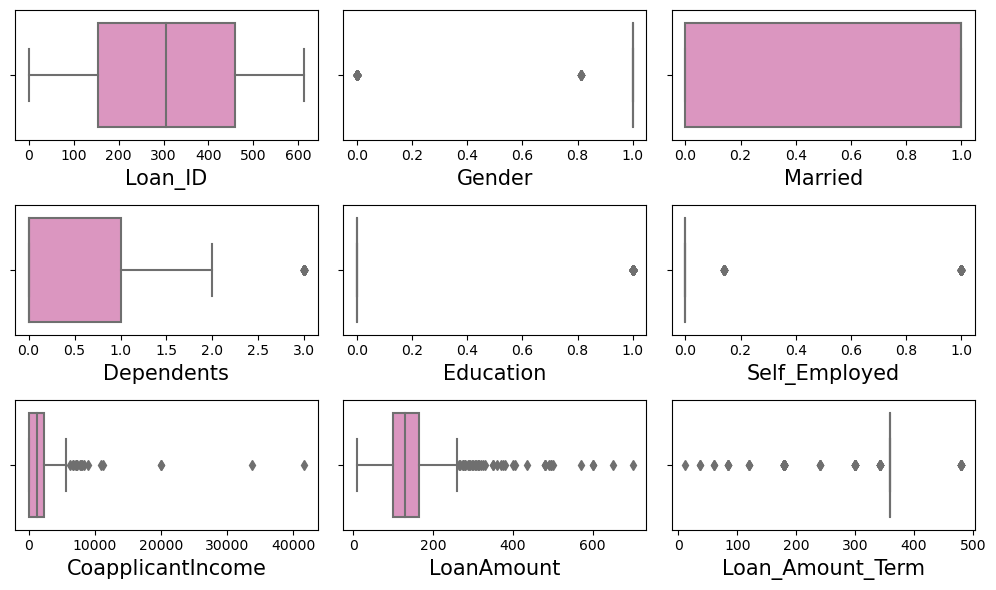

In [62]:
#lets check the outliers by plotting boxplot of numerical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(new_df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


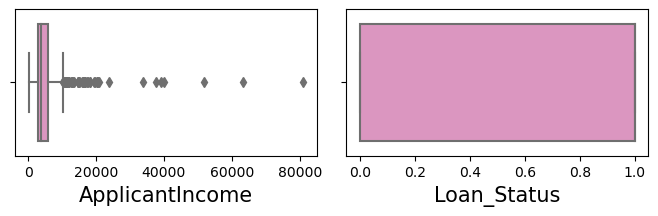

In [63]:
#lets check the outliers by plotting boxplot of categorical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in categorical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(new_df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


In [64]:
#by using z score, we get rid of outlier

from scipy.stats import zscore

out_features=new_df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount',
                    'Loan_Amount_Term','Credit_History','Property_Area']]
z=np.abs(zscore(out_features))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.483728,1.370299,0.761490,0.528362,0.415953,0.072991,0.554487,0.000000,0.279851,0.451640,1.223298
1,0.483728,0.733351,0.236612,0.528362,0.415953,0.134412,0.038732,0.219273,0.279851,0.451640,1.318513
2,0.483728,0.733351,0.761490,0.528362,2.536301,0.393747,0.554487,0.957641,0.279851,0.451640,1.223298
3,0.483728,0.733351,0.761490,1.892641,0.415953,0.462062,0.251980,0.314547,0.279851,0.451640,1.223298
4,0.483728,1.370299,0.761490,0.528362,0.415953,0.097728,0.554487,0.064454,0.279851,0.451640,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,2.111992,1.370299,0.761490,0.528362,0.415953,0.410130,0.554487,0.898095,0.279851,0.451640,1.318513
610,0.483728,0.733351,2.232816,0.528362,0.415953,0.212557,0.554487,1.267279,2.518655,0.451640,1.318513
611,0.483728,0.733351,0.236612,0.528362,0.415953,0.437174,0.472404,1.269371,0.279851,0.451640,1.223298
612,0.483728,0.733351,1.234714,0.528362,0.415953,0.357064,0.554487,0.483367,0.279851,0.451640,1.223298


In [65]:
#threshold =3

np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [66]:
df2=new_df[(z<3).all(axis=1)]
df2.shape

(577, 13)

In [67]:
#shape of old and new dataframe

print("old data frame",new_df.shape[0])
print("new data frame",df2.shape[0])

old data frame 614
new data frame 577


In [68]:
print("Data loss percentage",((new_df.shape[0]-df2.shape[0])/new_df.shape[0])*100)

Data loss percentage 6.026058631921824


In [69]:
df2.shape

(577, 13)

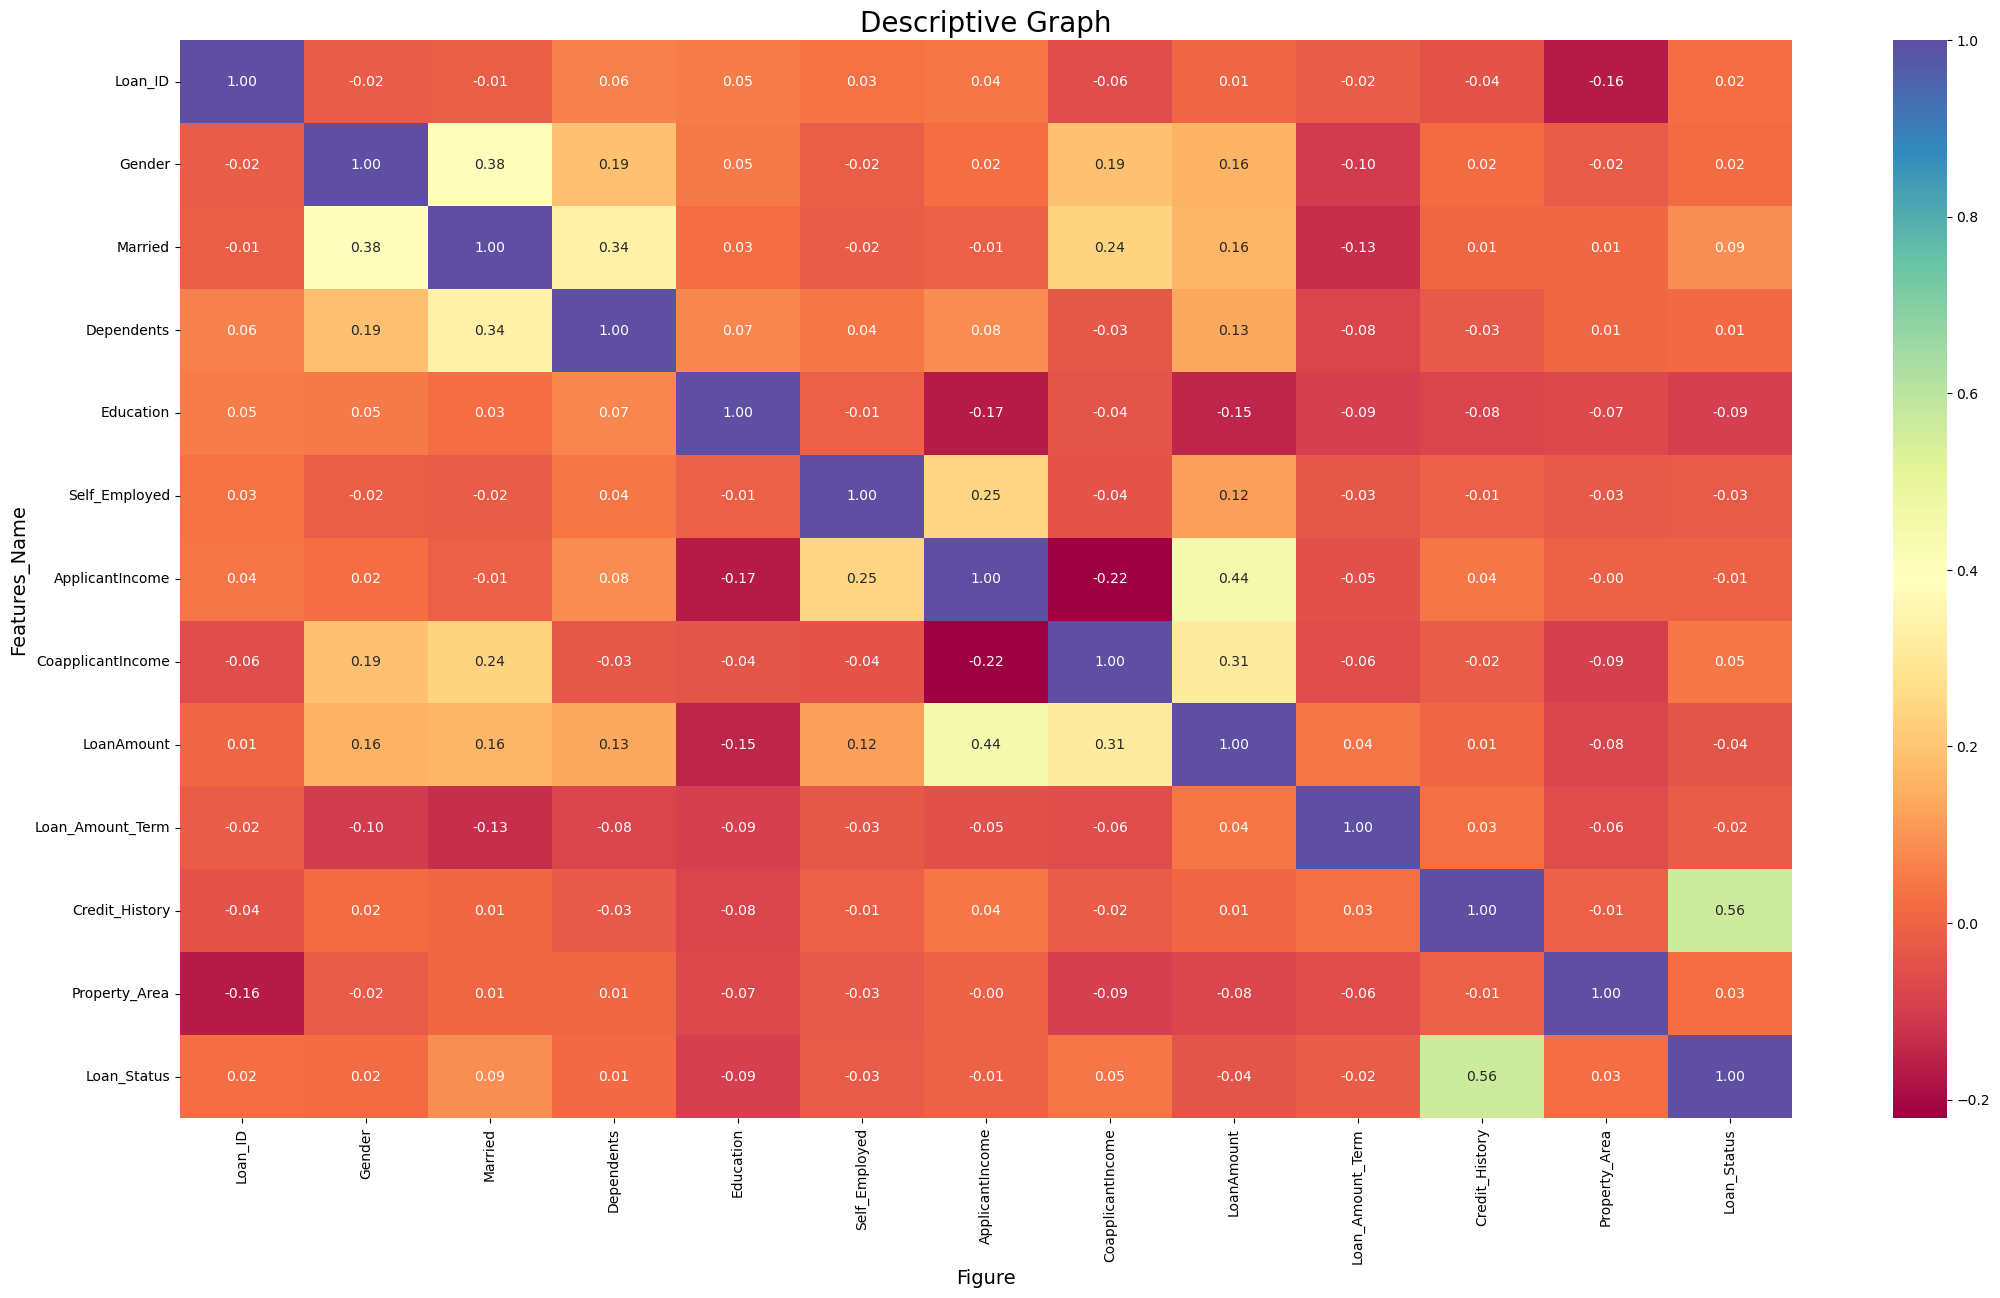

In [70]:
plt.figure(figsize=(26,14))
sns.heatmap(df2.corr(),annot =True, fmt ='0.2f',linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [71]:
# let drop the less correlated variable from the table 

df2=df2.drop('Dependents',axis=True)

In [72]:
df2.corr()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.016901,-0.012356,0.053931,0.034955,0.037729,-0.059912,0.006092,-0.018205,-0.043207,-0.164096,0.023530
Gender,-0.016901,1.000000,0.380302,0.048775,-0.015693,0.024911,0.189237,0.158169,-0.103941,0.019861,-0.024981,0.020305
Married,-0.012356,0.380302,1.000000,0.026914,-0.017187,-0.010558,0.240353,0.164108,-0.128379,0.011646,0.009153,0.086600
Education,0.053931,0.048775,0.026914,1.000000,-0.008195,-0.166400,-0.037780,-0.146598,-0.094628,-0.080920,-0.068596,-0.092658
Self_Employed,0.034955,-0.015693,-0.017187,-0.008195,1.000000,0.245576,-0.040184,0.118696,-0.033738,-0.008927,-0.029207,-0.025038
ApplicantIncome,0.037729,0.024911,-0.010558,-0.166400,0.245576,1.000000,-0.220975,0.442394,-0.050606,0.044016,-0.003641,-0.005003
CoapplicantIncome,-0.059912,0.189237,0.240353,-0.037780,-0.040184,-0.220975,1.000000,0.309479,-0.060345,-0.019224,-0.093505,0.045009
LoanAmount,0.006092,0.158169,0.164108,-0.146598,0.118696,0.442394,0.309479,1.000000,0.040302,0.006094,-0.075749,-0.035289
Loan_Amount_Term,-0.018205,-0.103941,-0.128379,-0.094628,-0.033738,-0.050606,-0.060345,0.040302,1.000000,0.030430,-0.058990,-0.018144
Credit_History,-0.043207,0.019861,0.011646,-0.080920,-0.008927,0.044016,-0.019224,0.006094,0.030430,1.000000,-0.009747,0.561857


In [73]:
#Encoding categorical columns using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df2.columns:
    if df2[i].dtypes != 'float':
        df2[i]= OE.fit_transform(df2[i].values.reshape(-1,1))
df2

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,364.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,296.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,1.0,134.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,1.0,0.0,86.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,369.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,121.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,0.0,0.0,265.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,0.0,0.0,417.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,0.0,0.0,409.0,0.0,187.000000,360.0,1.0,2.0,1.0


# #Checking how the data has been distributed in each column

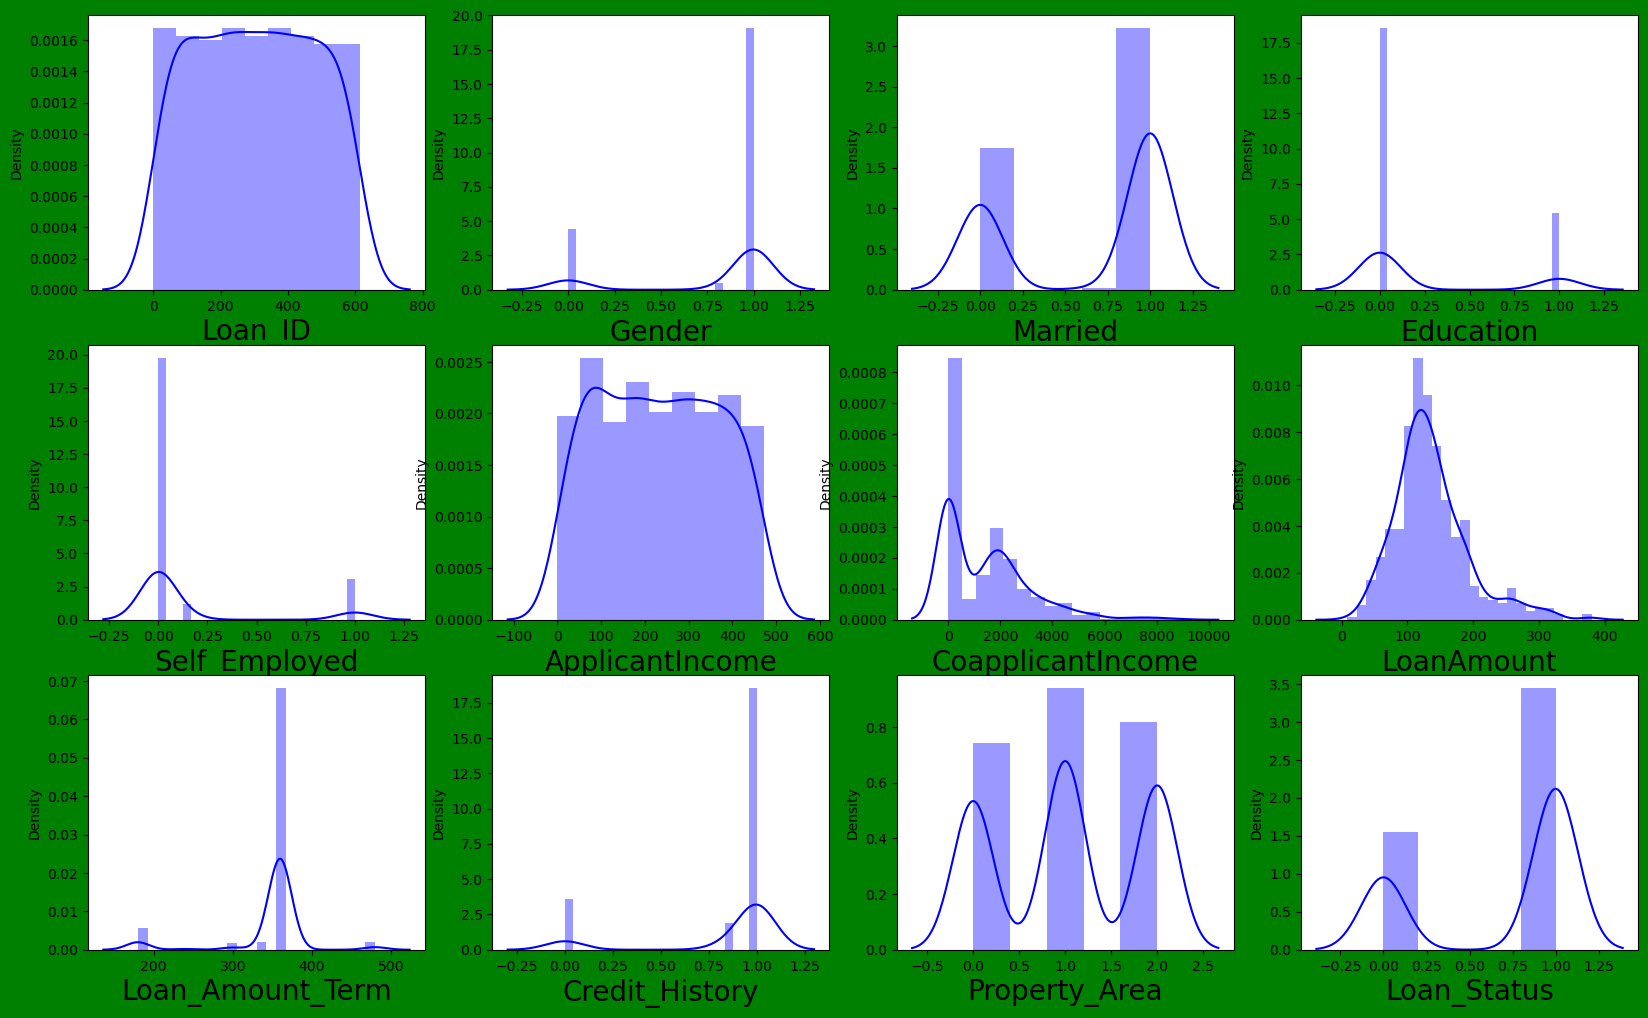

In [74]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df2:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    


In [75]:
df2.skew()

Loan_ID              0.010879
Gender              -1.608282
Married             -0.623506
Education            1.306588
Self_Employed        2.217399
ApplicantIncome      0.038608
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness of Credit history column is -1.921 so the weight in the right tail of the distribution. The skewness of Self_employed is 2.217, which indicate that skewness is on the left side. 

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [78]:
#removing skewness using cuberoot method

df2['Credit_History']=np.cbrt(df2['Credit_History'])


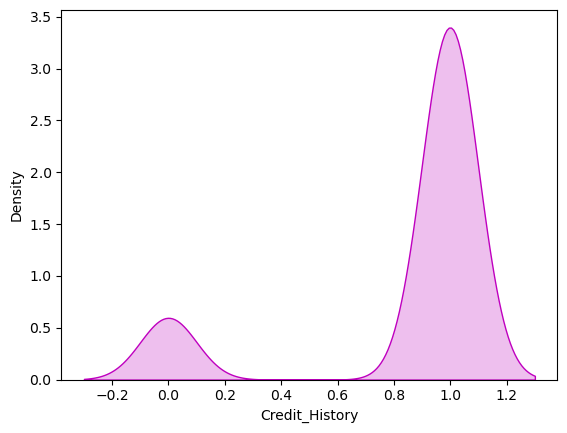

In [79]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Credit_History'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [80]:
#removing skewness using cuberoot method

df2['Loan_Amount_Term']=np.cbrt(df2['Loan_Amount_Term'])


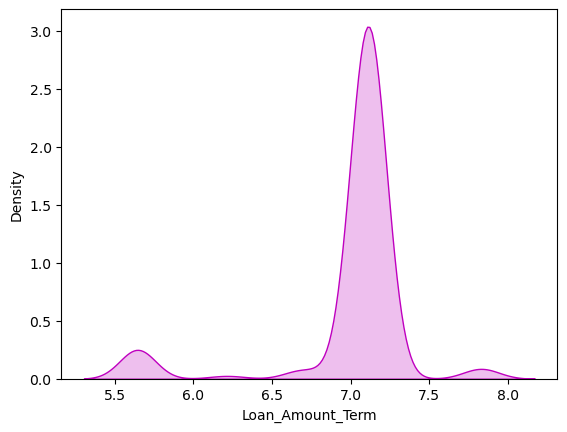

In [81]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Loan_Amount_Term'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [82]:
#removing skewness using cuberoot method

df2['Self_Employed']=np.cbrt(df2['Self_Employed'])


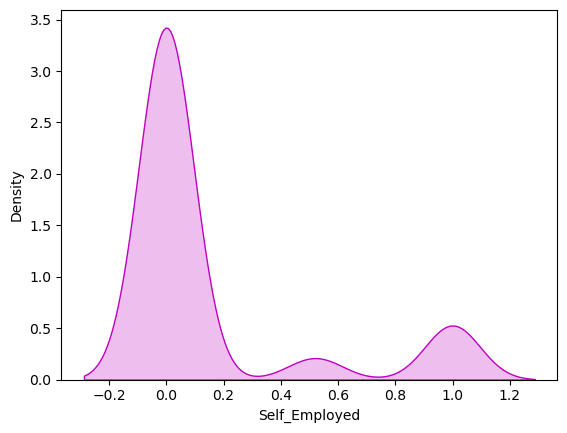

In [83]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Self_Employed'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

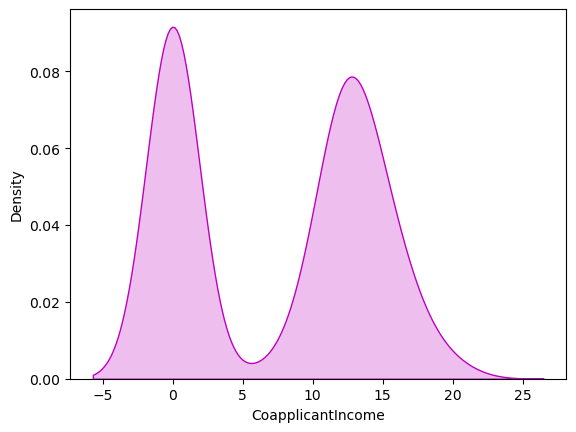

In [84]:
#removing skewness using cuberoot method

df2['CoapplicantIncome']=np.cbrt(df2['CoapplicantIncome'])
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['CoapplicantIncome'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [85]:
#removing skewness using cuberoot method

df2['Gender']=np.cbrt(df2['Gender'])


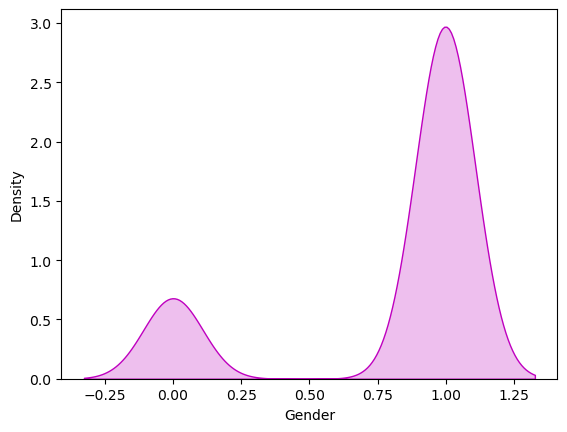

In [86]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Gender'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

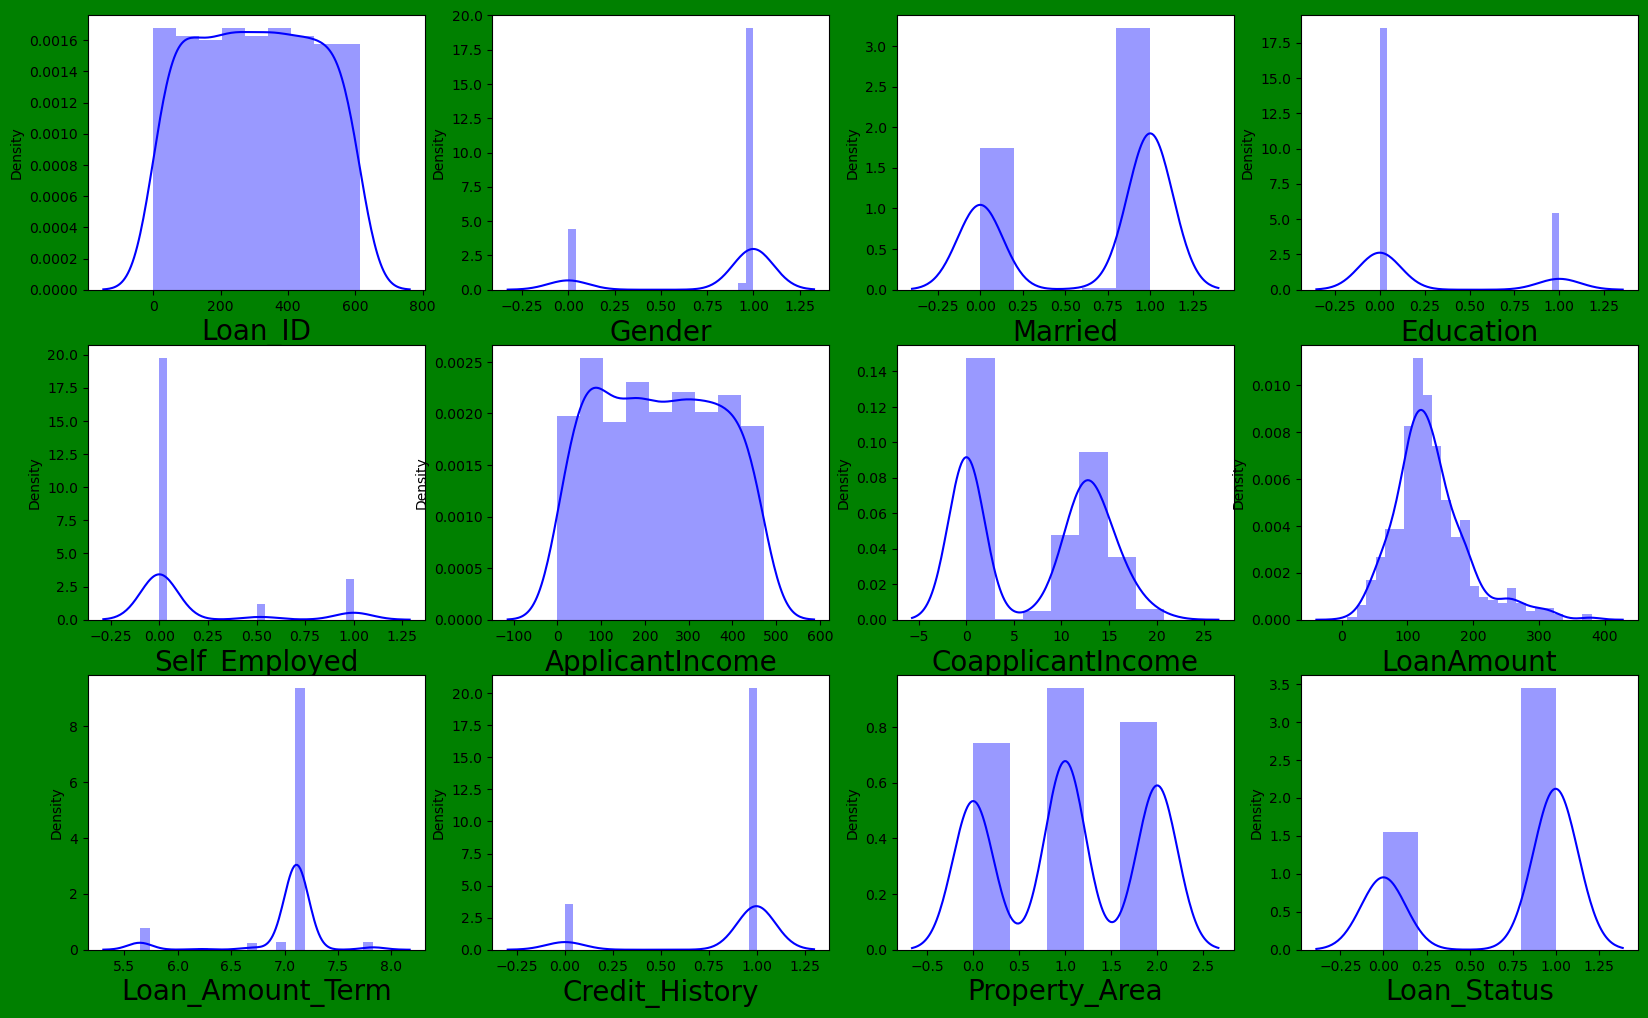

In [87]:
#Rechecking the skewness level in the dataframe df2

plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df2:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

In [124]:
df2.skew()

Loan_ID              0.010879
Gender              -1.620899
Married             -0.623506
Education            1.306588
Self_Employed        1.921930
ApplicantIncome      0.038608
CoapplicantIncome   -0.038951
LoanAmount           1.113132
Loan_Amount_Term    -2.557136
Credit_History      -1.975206
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

## Correlation between target variable and independent variables

In [89]:
#Now we will check the correlation target variable and independent variable
df2.corr()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.013304,-0.012356,0.053931,0.024744,0.011625,-0.041696,0.006092,-0.019675,-0.043034,-0.164096,0.023530
Gender,-0.013304,1.000000,0.380926,0.046815,-0.019086,0.062933,0.230395,0.159399,-0.104045,0.014741,-0.025869,0.018449
Married,-0.012356,0.380926,1.000000,0.026914,-0.023903,-0.023072,0.323538,0.164108,-0.124914,0.017030,0.009153,0.086600
Education,0.053931,0.046815,0.026914,1.000000,-0.010622,-0.184374,0.030281,-0.146598,-0.099780,-0.075952,-0.068596,-0.092658
Self_Employed,0.024744,-0.019086,-0.023903,-0.010622,1.000000,0.181183,-0.069933,0.105444,-0.026229,0.008491,-0.030504,-0.020115
ApplicantIncome,0.011625,0.062933,-0.023072,-0.184374,0.181183,1.000000,-0.347034,0.483913,-0.048679,0.043659,-0.049362,-0.013230
CoapplicantIncome,-0.041696,0.230395,0.323538,0.030281,-0.069933,-0.347034,1.000000,0.208957,-0.013641,0.001046,-0.081866,0.071908
LoanAmount,0.006092,0.159399,0.164108,-0.146598,0.105444,0.483913,0.208957,1.000000,0.047131,0.008256,-0.075749,-0.035289
Loan_Amount_Term,-0.019675,-0.104045,-0.124914,-0.099780,-0.026229,-0.048679,-0.013641,0.047131,1.000000,0.039293,-0.064844,-0.008652
Credit_History,-0.043034,0.014741,0.017030,-0.075952,0.008491,0.043659,0.001046,0.008256,0.039293,1.000000,-0.008321,0.561462


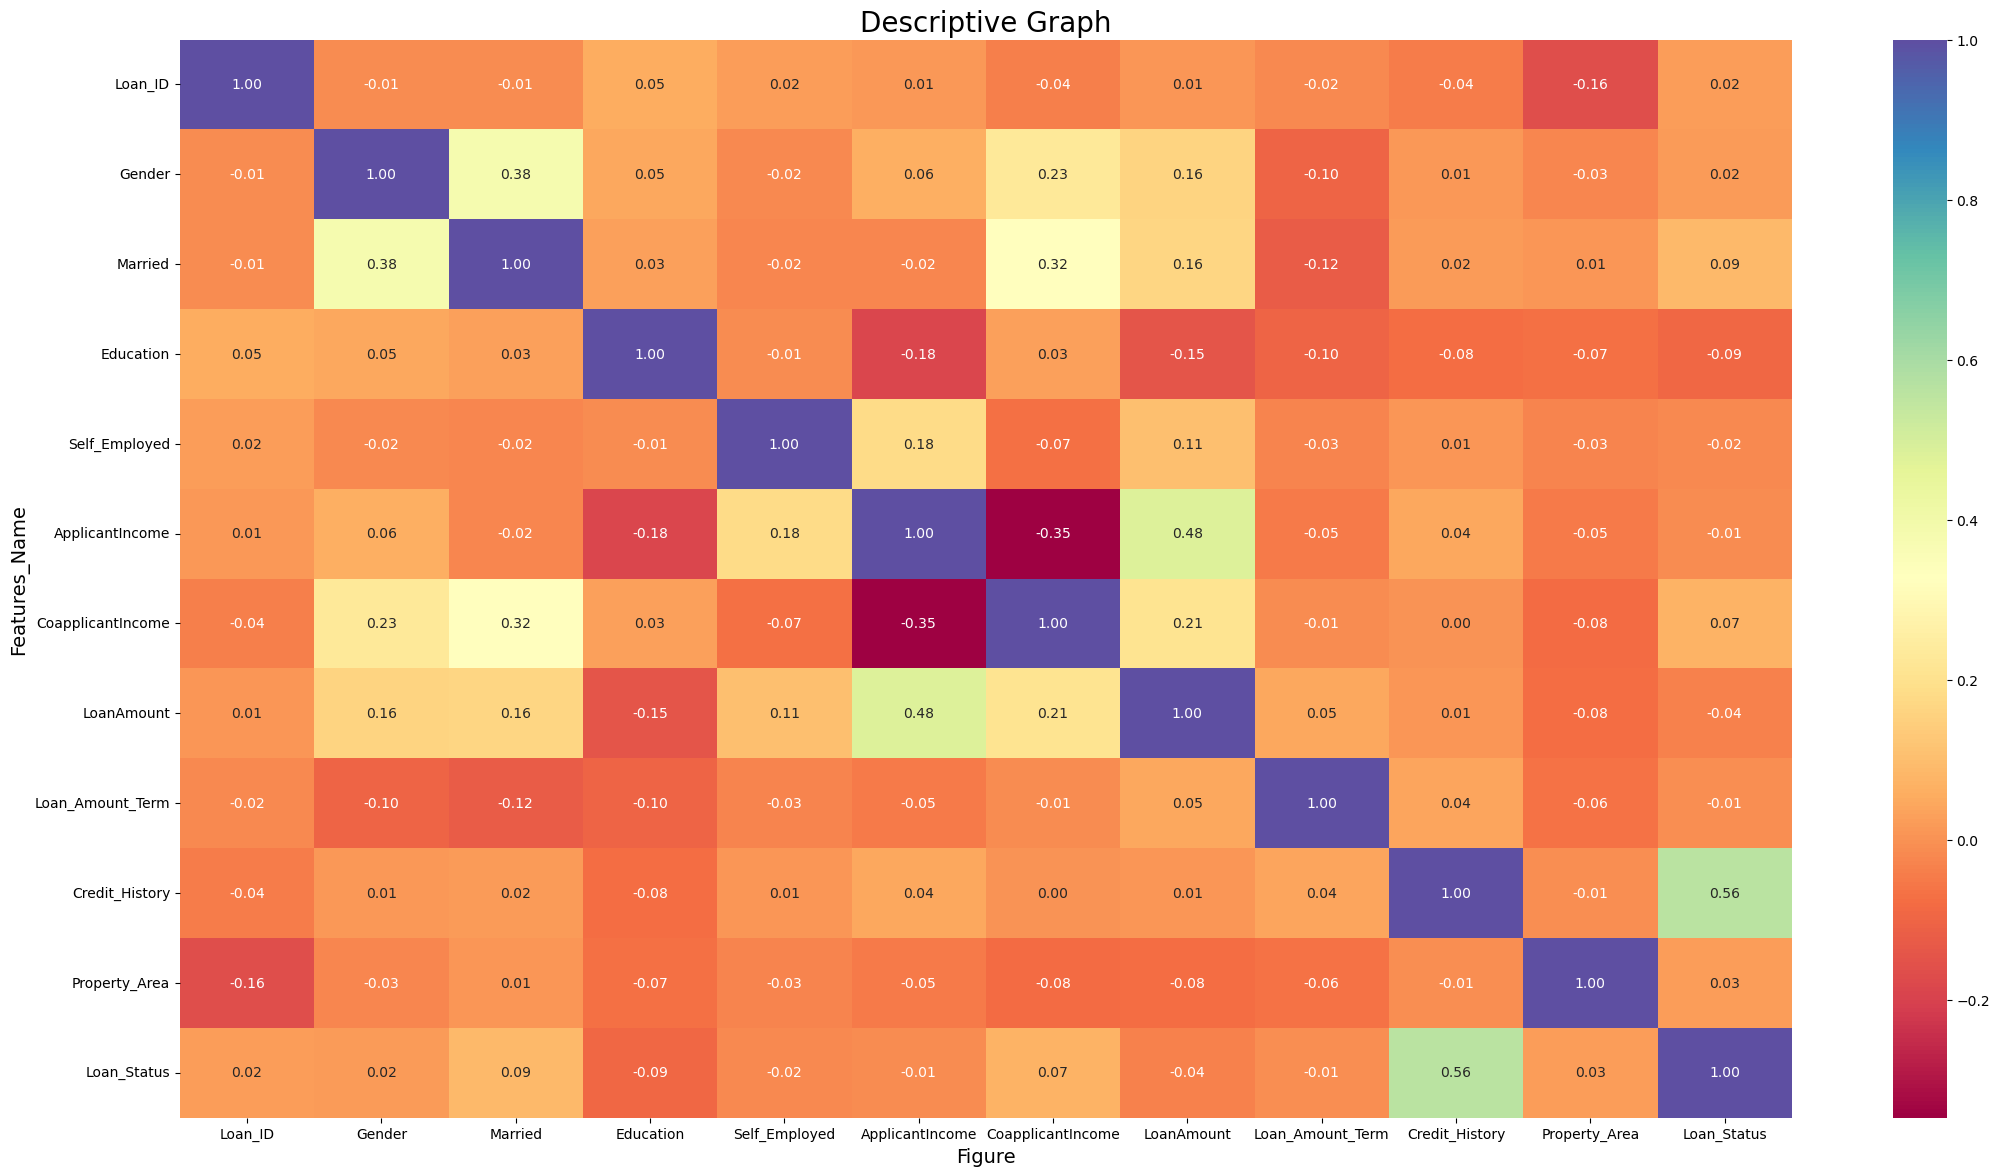

In [125]:
plt.figure(figsize=(26,14))
sns.heatmap(df2.corr(),annot =True, fmt ='0.2f',linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

Based on the correlation graph, Loan status is highly correlated with credit history, if the credit history is good, loan status would be approved. It is less related to Applicant income, Loan amount term and property area.

In [126]:
df2.corr()['Loan_Status'].sort_values()

Education           -0.092658
LoanAmount          -0.035289
Self_Employed       -0.020115
ApplicantIncome     -0.013230
Loan_Amount_Term    -0.008652
Gender               0.018449
Loan_ID              0.023530
Property_Area        0.026507
CoapplicantIncome    0.071908
Married              0.086600
Credit_History       0.561462
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

## Visualizing the correlation between label and features using bar plot 

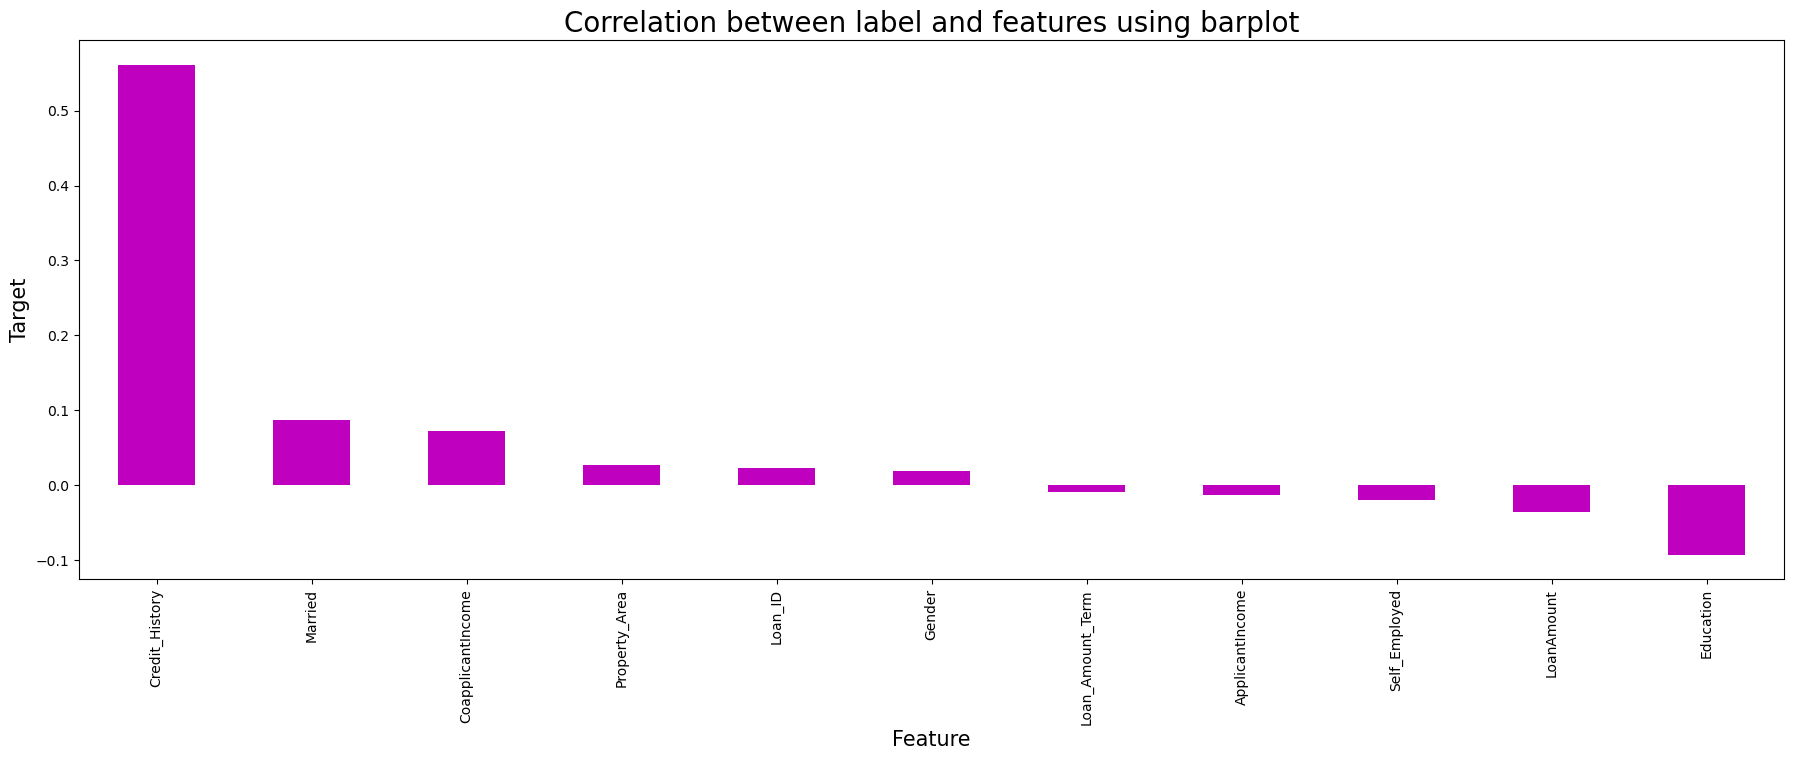

In [127]:
plt.figure(figsize = (22,7))
df2.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color ="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()


## Seperating features and label

In [188]:
#Seperating the independent and target variables into x and y
x = df2.drop(["Loan_Amount_Term","ApplicantIncome","Self_Employed"],axis=1)
y = df2['Loan_Status'].astype(int)

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (577, 9)
Label Dimension (577,)


## Feature Scaling using Standard Scalarization

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,Loan_ID,Gender,Married,Education,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,-1.722109,0.481012,-1.360627,-0.541961,-1.093504,0.184585,0.423343,1.227472,0.670633
1,-1.716445,0.481012,0.738780,-0.541961,0.596681,-0.143355,0.423343,-1.306522,-1.491128
2,-1.710782,0.481012,0.738780,-0.541961,-1.093504,-1.247642,0.423343,1.227472,0.670633
3,-1.705118,0.481012,0.738780,1.845150,0.868268,-0.285844,0.423343,1.227472,0.670633
4,-1.699455,0.481012,-1.360627,-0.541961,-1.093504,0.088189,0.423343,1.227472,0.670633
...,...,...,...,...,...,...,...,...,...
572,1.726889,-2.095263,-1.360627,-0.541961,-1.093504,-1.158587,0.423343,-1.306522,0.670633
573,1.732552,0.481012,0.738780,-0.541961,-1.093504,-1.710730,0.423343,-1.306522,0.670633
574,1.738215,0.481012,0.738780,-0.541961,-0.177556,2.083030,0.423343,1.227472,0.670633
575,1.743879,0.481012,0.738780,-0.541961,-1.093504,0.907499,0.423343,1.227472,0.670633


In [190]:
y.value_counts()

y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [191]:
x.value_counts()

Loan_ID    Gender     Married    Education  CoapplicantIncome  LoanAmount  Credit_History  Property_Area  Loan_Status
-1.722109   0.481012  -1.360627  -0.541961  -1.093504           0.184585    0.423343        1.227472       0.670633      1
-0.000442   0.481012  -1.360627  -0.541961   0.906882           0.070378    0.423343       -1.306522       0.670633      1
 0.543243   0.481012   0.738780   1.845150  -1.093504          -1.621675   -2.389175        1.227472      -1.491128      1
 0.548906   0.481012  -1.360627   1.845150  -1.093504          -1.265453    0.423343       -1.306522      -1.491128      1
 0.560233  -2.095263  -1.360627   1.845150  -1.093504          -1.479186    0.423343       -0.039525       0.670633      1
                                                                                                                        ..
-0.561116  -2.095263  -1.360627   1.845150  -1.093504          -0.285844    0.423343       -0.039525       0.670633      1
-0.555453  -2.095263 

## Checking Variance Inflation Factor(VIF)


In [196]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif


,VIF values,Features
0,1.040753,Loan_ID
1,1.200996,Gender
2,1.274135,Married
3,1.050946,Education
4,1.182654,CoapplicantIncome
5,1.108666,LoanAmount
6,1.479104,Credit_History
7,1.049456,Property_Area
8,1.506503,Loan_Status


In [197]:
pd.DataFrame(x).describe().round(5)

,Loan_ID,Gender,Married,Education,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
count,577.00000,577.00000,577.00000,577.00000,577.00000,577.00000,577.00000,577.00000,577.00000
mean,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000
std,1.00087,1.00087,1.00087,1.00087,1.00087,1.00087,1.00087,1.00087,1.00087
min,-1.72211,-2.09526,-1.36063,-0.54196,-1.09350,-2.26287,-2.38918,-1.30652,-1.49113
25%,-0.86694,0.48101,-1.36063,-0.54196,-1.09350,-0.64207,0.42334,-1.30652,-1.49113
50%,-0.00611,0.48101,0.73878,-0.54196,0.49632,-0.14336,0.42334,-0.03953,0.67063
75%,0.86039,0.48101,0.73878,-0.54196,0.83871,0.42660,0.42334,1.22747,0.67063
max,1.74954,0.48101,0.73878,1.84515,1.97005,4.34504,0.42334,1.22747,0.67063


In [200]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

y_transformed=y


[1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 0 0 1 

## Creating train test split

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN


In [201]:

from sklearn.neighbors import KNeighborsRegressor

maxAcc = 0
maxRS = 0

for i in range(1, 600):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    KNN = KNeighborsRegressor(n_neighbors=5)  
    KNN.fit(x_train, y_train)
    pred = KNN.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is", maxAcc, "at random_state", maxRS)

Max r2 score accuracy is 0.9929563567362428 at random_state 214


# Modeling

In [202]:

from sklearn.svm import SVC
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [203]:
#Model building using different type of regressor by looping them all to get the accuracy of each classifier:

model=[KNeighborsRegressor(),RandomForestRegressor(),LinearRegression(),DecisionTreeRegressor(),
       GradientBoostingRegressor(),SVC()]

for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x_train,y_train)
    
    print('Accuracy score of :',m)
    
    # prediction
    pred=m.predict(x_test)
    
    print('R2_Score:',r2_score(y_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x,y,cv=5).mean())

    print ("The difference between R2 score and CV is", (r2_score(y_test,pred)-(cross_val_score(m,x,y,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    

--------------------------------------------------------------------
Accuracy score of : KNeighborsRegressor()
R2_Score: 0.843942723942724
MAE: 0.06379310344827586
MSE: 0.03482758620689656
RMSE: 0.18662150521013532
Cross_Validaton_Score 0.8969258555547711
The difference between R2 score and CV is -0.05298313161204715
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : RandomForestRegressor()
R2_Score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
Cross_Validaton_Score 1.0
The difference between R2 score and CV is 0.0
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : LinearRegression()
R2_Score: 1.0
MAE: 3.8666388099014073e-16
MSE: 2.633078290864315e-31
RMSE: 5.131352931600315e-16
Cross_Validaton_Score 1.0
The difference between R2 score and CV is 0.0
---------------------------------

Observing the classifiers in our model, KNNeighbour model is our best model as the difference between accuracy score and cross validation is least. 

# Hyperparameter Tuning
Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [204]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()

# hyperparameters we are using is knn regressor to tune our hyperparameters

param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']}

# GridSearchCV object with the KNeighborsRegressor, the parameter grid, and cross-validation folds (cv)

grid = GridSearchCV(knn, param_grid, cv=5)


In [205]:
# Fitting our GridSearchCV Object
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [206]:
grid.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [208]:
#Create a final model using KNN fit

Final_model =KNeighborsRegressor()

Final_model.fit(x_train,y_train)

#predict the target variable using the test data
y_prediction= Final_model.predict(x_test)
y_prediction
acc = r2_score(y_test,pred)
print('Our model learn and for  Loan status is',acc*100)

Our model learn and for  Loan status is 100.0


# saving the model


In [209]:
import joblib
joblib.dump(Final_model,"Loan_Application.pkl")

['Loan_Application.pkl']

# Predicting the saved model


In [210]:
#Lets load the saved model and get the prediction

model = joblib.load("Loan_Application.pkl")

#Prediction
y_prediction = model.predict(x_test)
y_prediction


array([1. , 1. , 0.2, 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. ,
       1. , 1. , 0.6, 1. , 0.2, 0. , 0.2, 1. , 1. , 1. , 1. , 1. , 0.4,
       1. , 0.2, 0.6, 1. , 0. , 1. , 0. , 1. , 0.2, 0.2, 1. , 0.6, 0. ,
       0. , 0. , 1. , 1. , 1. , 0. , 1. , 1. , 0.4, 0.4, 1. , 0. , 1. ,
       0. , 0. , 0.2, 1. , 1. , 1. , 1. , 1. , 0.6, 0. , 0. , 0. , 1. ,
       1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 1. , 1. , 0. , 1. , 0.2,
       0. , 1. , 0. , 1. , 1. , 0. , 1. , 1. , 0.4, 1. , 1. , 0.8, 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 1. ])

In [212]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y_prediction
df["Original"]=a
df

,Predicted,Original
0,1.0,1
1,1.0,1
2,0.2,0
3,1.0,1
4,0.0,0
...,...,...
111,1.0,1
112,1.0,1
113,0.0,0
114,0.0,0


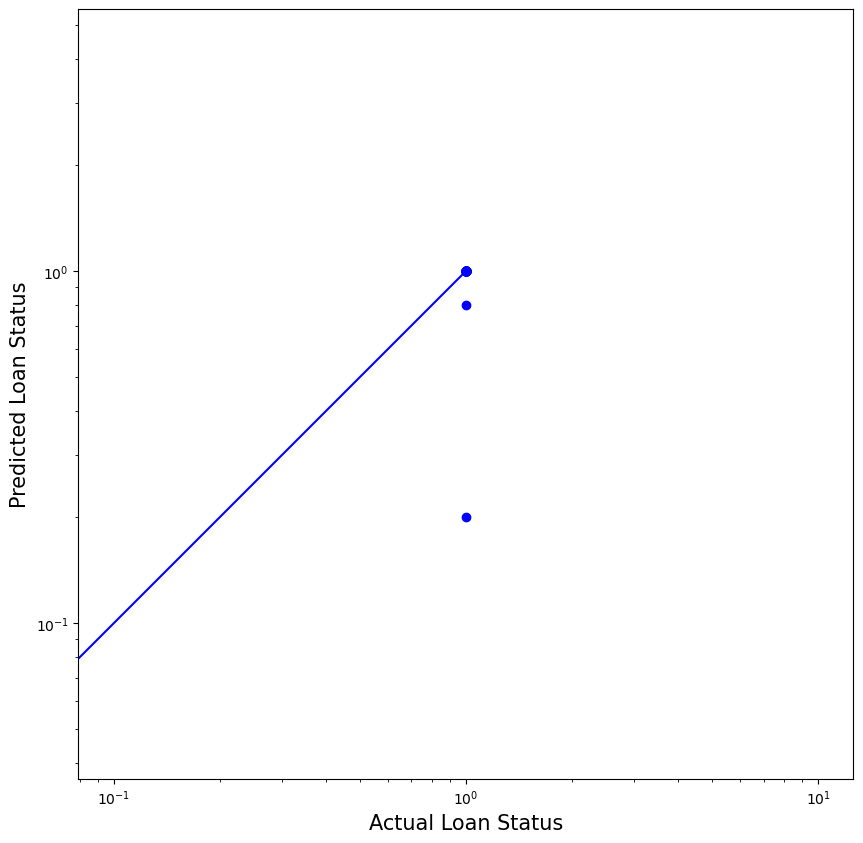

In [215]:
#Lets view it on the graph the relation between predicted and original values

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_prediction, c='blue')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_prediction), max(y_test))
p2 = min(min(y_prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Loan Status', fontsize=15)
plt.ylabel('Predicted Loan Status', fontsize=15)
plt.axis('equal')
plt.show()

Our KNeighbour regression model does the best accuracy of 100% hence, this is the best model to evaluate the result of Loan Status of Application.  